In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os
from os import listdir
from PIL import Image
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import img_to_array
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
from sklearn.model_selection import train_test_split

In [7]:
dirs = "train"
root_dir = listdir(dirs)
root_dir = root_dir[:3]
root_dir

['CREAM COLORED WOODPECKER', 'CAMPO FLICKER', 'RUFUOS MOTMOT']

In [10]:
X, y = [], []

for directory in root_dir:
    dir_path = os.path.join(dirs, directory)
    if os.path.isdir(dir_path):
        for file_name in os.listdir(dir_path):
            image_path = os.path.join(dir_path, file_name)
            image = cv2.imread(image_path)
            image = img_to_array(image)
            X.append(image)
            y.append(directory)

In [15]:
X[0].shape

(224, 224, 3)

In [16]:
X = np.array(X, dtype=np.float32) / 225.0

In [17]:
X = X.reshape(-1, 224, 224, 3)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4242)

In [19]:
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)

In [21]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

In [27]:
model = Sequential([
    Conv2D(8, (3,3), input_shape=(224, 224, 3), activation="relu"),
    MaxPooling2D((3,3)),
    
    Conv2D(16, (3,3), activation="relu"),
    MaxPooling2D((3,3)),
    
    Conv2D(32, (3,3), activation="relu"),
    MaxPooling2D((3,3)),
    
    Flatten(),
    
    Dense(32, activation="relu"),
    Dense(3, activation="softmax")
])

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 8)       224       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 8)        0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 16)        1168      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 24, 24, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 22, 22, 32)        4640      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 32)        

In [29]:
model.compile(loss="categorical_crossentropy", optimizer=Adam(0.0001), metrics=["accuracy"])

In [30]:
history = model.fit(X_train, y_train, batch_size=128, epochs=50, validation_data=(X_valid, y_valid))

Epoch 1/50
3/3 [==============================] - 1s 405ms/step - loss: 1.0849 - accuracy: 0.3512 - val_loss: 1.0771 - val_accuracy: 0.4048
Epoch 2/50
3/3 [==============================] - 1s 346ms/step - loss: 1.0768 - accuracy: 0.3512 - val_loss: 1.0681 - val_accuracy: 0.4048
Epoch 3/50
3/3 [==============================] - 1s 357ms/step - loss: 1.0701 - accuracy: 0.3512 - val_loss: 1.0604 - val_accuracy: 0.4048
Epoch 4/50
3/3 [==============================] - 1s 354ms/step - loss: 1.0641 - accuracy: 0.3512 - val_loss: 1.0536 - val_accuracy: 0.4048
Epoch 5/50
3/3 [==============================] - 1s 365ms/step - loss: 1.0586 - accuracy: 0.3512 - val_loss: 1.0459 - val_accuracy: 0.4048
Epoch 6/50
3/3 [==============================] - 1s 358ms/step - loss: 1.0520 - accuracy: 0.3512 - val_loss: 1.0388 - val_accuracy: 0.4048
Epoch 7/50
3/3 [==============================] - 1s 350ms/step - loss: 1.0461 - accuracy: 0.3542 - val_loss: 1.0317 - val_accuracy: 0.4048
Epoch 8/50
3/3 [====

In [33]:
scores = model.evaluate(X_test, y_test)
scores = round((scores[1] * 100), 2)
print("Test Accuracy:", scores)

4/4 [==============================] - 0s 30ms/step - loss: 0.5916 - accuracy: 0.7429
Test Accuracy: 74.29


In [34]:
y_pred = model.predict(X_test)

4/4 [==============================] - 0s 29ms/step


In [35]:
print("Originally: ", root_dir[np.argmax(y_test[1])])
print("Predicted:" , root_dir[np.argmax(y_pred[1])])

Originally:  CREAM COLORED WOODPECKER
Predicted: CREAM COLORED WOODPECKER


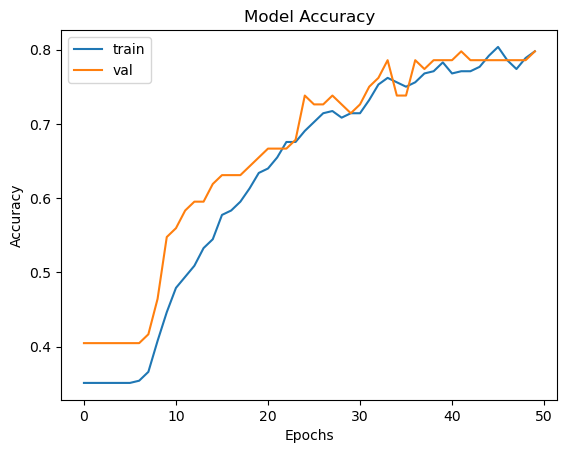

In [36]:
plt.figure()
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["train", "val"])
plt.show()

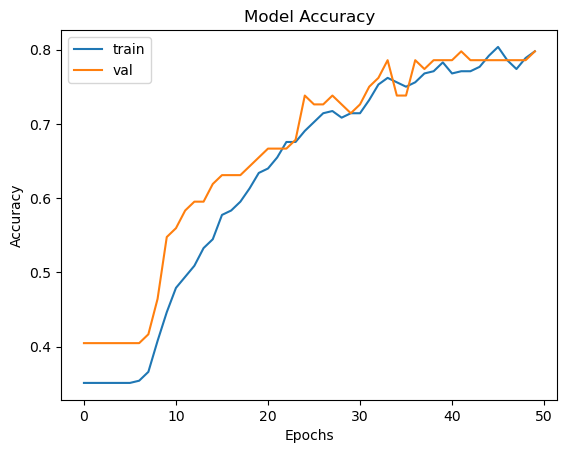

In [37]:
plt.figure()
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["train", "val"])
plt.show()

In [38]:
model.save("BirdSpeciesPrediction.h5")

In [41]:
count = 0
for i in range(1, 100):
    if root_dir[np.argmax(y_test[i])] == root_dir[np.argmax(y_pred[i])]:
        count += 1
        
print(count , "%")

74 %
